In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:

num_classes = len(os.listdir("C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini"))
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

base_dir = 'C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini'
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)




Found 7180 images belonging to 9 classes.
Found 1795 images belonging to 9 classes.


In [ ]:
hystory = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\AlessandroLaVeglia\AppData\Local\Temp\ipykernel_11520\1933068474.py", line 1, in <module>
    hystory = model.fit(
              ^^^^^^^^^^
  File "c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'test_generator'

During handling of the above exception, another exception occurred:

Traceback (most recent ca

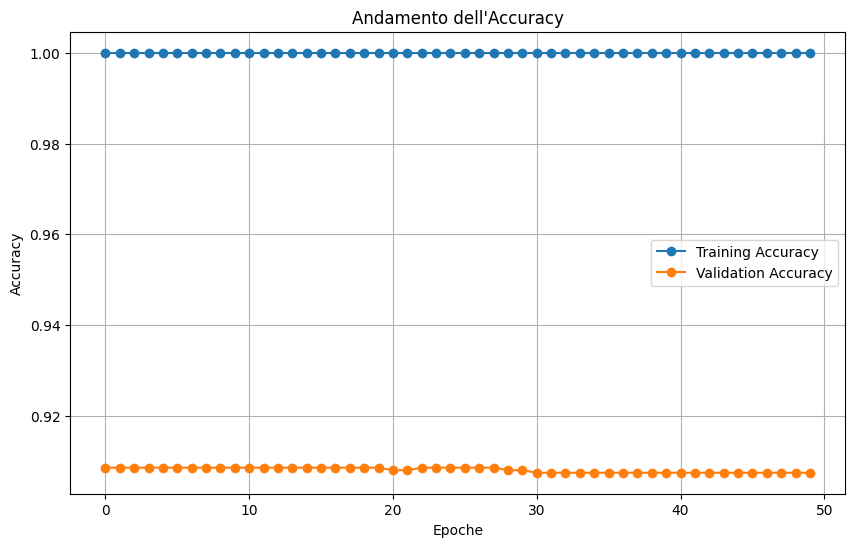

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(hystory.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(hystory.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Andamento dell\'Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
train_datagen2= ImageDataGenerator(rescale=1./255, validation_split=0.2)


test_generator = train_datagen2.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1795 images belonging to 9 classes.


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)


57/57 [==============================] - 7s 107ms/step


In [44]:
y_pred_prob = model.predict(test_generator)
print(y_pred_prob)

57/57 [==============================] - 5s 83ms/step
[[0.09342148 0.11602846 0.10648251 ... 0.14962134 0.08516944 0.12454374]
 [0.09132139 0.11809395 0.10559332 ... 0.12810393 0.10269357 0.12062521]
 [0.09499841 0.11157408 0.10598917 ... 0.12980469 0.10340355 0.11703268]
 ...
 [0.08948939 0.10546365 0.11197059 ... 0.12601396 0.10692324 0.12370925]
 [0.0945234  0.10972372 0.11443616 ... 0.12021797 0.10533349 0.12072101]
 [0.08694034 0.10686835 0.11412795 ... 0.14812772 0.08919853 0.12734215]]


In [ ]:

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
                          precision    recall  f1-score   support

               borraccia       0.00      0.00      0.00       200
   bottiglia di plastica       0.08      0.10      0.09       200
      bottiglia di vetro       0.24      0.10      0.14       200
bottiglietta di plastica       0.00      0.00      0.00       200
                  cuffie       0.00      0.00      0.00       200
                 headset       0.00      0.00      0.00       195
                keyboard       0.12      0.82      0.21       200
                   mouse       0.52      0.20      0.28       200
              smartphone       0.00      0.00      0.00       200

                accuracy                           0.13      1795
               macro avg       0.11      0.13      0.08      1795
            weighted avg       0.11      0.13      0.08      1795

Confusion Matrix:
[[  0  12   6   0   0   0 182   0   0]
 [  0  19   0   0   0   0 162  19   0]
 [  1  20  20   0   

c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlessandroLaVeglia\anaconda3\envs\Vision\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

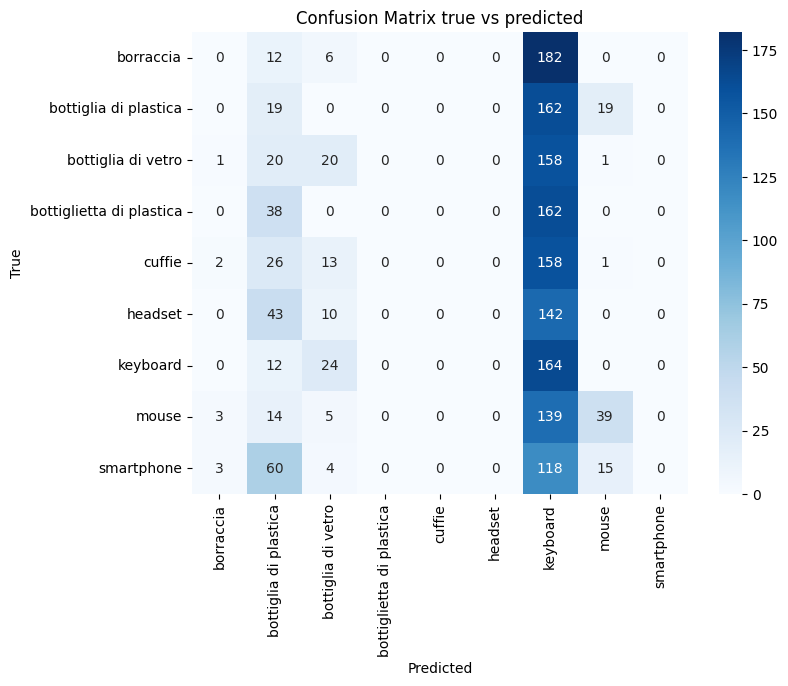

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix true vs predicted' )
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array



def predict_single_image(model, image_path, class_names):
    
    img_array = load_and_preprocess_image(image_path, target_size=(128, 128))

   
    predictions = model.predict(img_array)

 
    predicted_class_index = np.argmax(predictions[0])

   
    predicted_class = class_names[predicted_class_index]

    confidence_levels = {class_name: confidence * 100 for class_name, confidence in zip(class_names, predictions[0])}


    result = {
        'Predicted class': predicted_class,
        'Confidence levels': confidence_levels
    }

    return result

In [ ]:
image_to_predict = "C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini_di_prova/borraccia/borraccia_201.jpg"
class_names = ["borraccia", "bottiglia di plastica", "bottiglia di vetro", "bottiglietta di plastica", "cuffie", "headset", "keyboard", "mouse", "smartphone"]


prediction_result = predict_single_image(model, image_to_predict, class_names)


for key, value in prediction_result.items():
    if key == "Confidence levels":
        print(f"{key}:")
        for class_name, confidence_level in value.items():
            print(f"  {class_name}: {confidence_level:.2f}%")
    else:
        print(f"{key}: {value}")


1/1 [==============================] - 0s 180ms/step
Predicted class: keyboard
Confidence levels:
  borraccia: 12.20%
  bottiglia di plastica: 13.17%
  bottiglia di vetro: 13.28%
  bottiglietta di plastica: 11.59%
  cuffie: 7.84%
  headset: 7.74%
  keyboard: 13.29%
  mouse: 12.05%
  smartphone: 8.85%


In [ ]:
print("Training Dataset Information:")
print(f"Number of classes: {num_classes}")
print(f"Number of training images: {len(train_generator.classes)}")

print("\nValidation Dataset Information:")
print(f"Number of validation images: {len(test_generator.classes)}")


Training Dataset Information:
Number of classes: 9
Number of training images: 7180

Validation Dataset Information:
Number of validation images: 1795


In [ ]:
print("Model Summary:")
model.summary()


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176

In [ ]:
print("\nTesting Dataset Information:")
print(f"Number of testing images: {len(test_generator.classes)}")



Testing Dataset Information:
Number of testing images: 1795


In [ ]:



image_path_specific = "C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini_di_prova/headset/headset_4.jpg"
example_specific_actual_class = "headset"


img_array_specific = load_and_preprocess_image(image_path_specific, target_size=(128, 128))


predictions_specific = model.predict(img_array_specific)
predicted_class_index_specific = np.argmax(predictions_specific[0])
predicted_class_specific = class_names[predicted_class_index_specific]
confidence_specific = predictions_specific[0][predicted_class_index_specific] * 100

print("\nEsempio classificazione:")
print(f"- Immagine: {os.path.basename(image_path_specific)}")
print(f"- Classe Reale: {example_specific_actual_class}")
print(f"- Classe Predetta: {predicted_class_specific}")
print(f"- Confidenza: {confidence_specific:.2f}%")




1/1 [==============================] - 0s 85ms/step

Esempio classificazione:
- Immagine: headset_4.jpg
- Classe Reale: headset
- Classe Predetta: bottiglia di plastica
- Confidenza: 13.55%


In [51]:
import os

# Specifica il percorso della directory
directory_path = 'C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini'

directory_path2 = 'C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini_di_prova'

# Utilizza os.listdir per ottenere una lista di tutti gli elementi nella directory
# e filtra solo quelli che sono directory
folder_names = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

folder_names2 = [f for f in os.listdir(directory_path2) if os.path.isdir(os.path.join(directory_path, f))]

print("this are the folder names\n", folder_names)
print("this are the folder names\n", folder_names2)

this are the folder names
 ['borraccia', 'bottiglia di plastica', 'bottiglia di vetro', 'bottiglietta di plastica', 'cuffie', 'headset', 'keyboard', 'mouse', 'smartphone']
this are the folder names
 ['borraccia', 'bottiglia di plastica', 'bottiglia di vetro', 'bottiglietta di plastica', 'cuffie', 'headset', 'keyboard', 'mouse', 'smartphone']


In [56]:
base_dir2 = "C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini"
print(len(base_dir2))

57


In [62]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the base directory
base_dir = 'C:/Users/AlessandroLaVeglia/repo_git/Vision-Exam/immagini'

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Define and compile the model
num_classes = len(train_generator.class_indices)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using only the training generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50
)


Found 7180 images belonging to 9 classes.
Epoch 1/50
 36/224 [===>..........................] - ETA: 43s - loss: 2.1752 - accuracy: 0.1727

KeyboardInterrupt: 

In [ ]:
# Assuming you have a separate test generator
test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Adjust this if your test data is in a different subset
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
